In [1]:
# importing the required module 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from statistics import mean, stdev
from scipy.stats import sem
import scipy.stats as stats

In [2]:
#Optional for disabling warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [4]:
df = pd.read_excel (r'./Quiz1.xlsx', index_col=0) 
df.describe()

,ID,SIS User ID,Unnamed: 6,Quiz1
count,18.000000,1.700000e+01,0.0,17.000000
mean,156321.555556,9.002658e+08,NaN,28.970588
std,85266.110323,7.168769e+04,NaN,4.614754
min,4372.000000,9.000577e+08,NaN,14.000000
25%,151464.500000,9.002385e+08,NaN,27.500000
50%,173754.500000,9.002847e+08,NaN,30.000000
75%,224566.750000,9.003025e+08,NaN,32.000000
max,242785.000000,9.003564e+08,NaN,33.000000


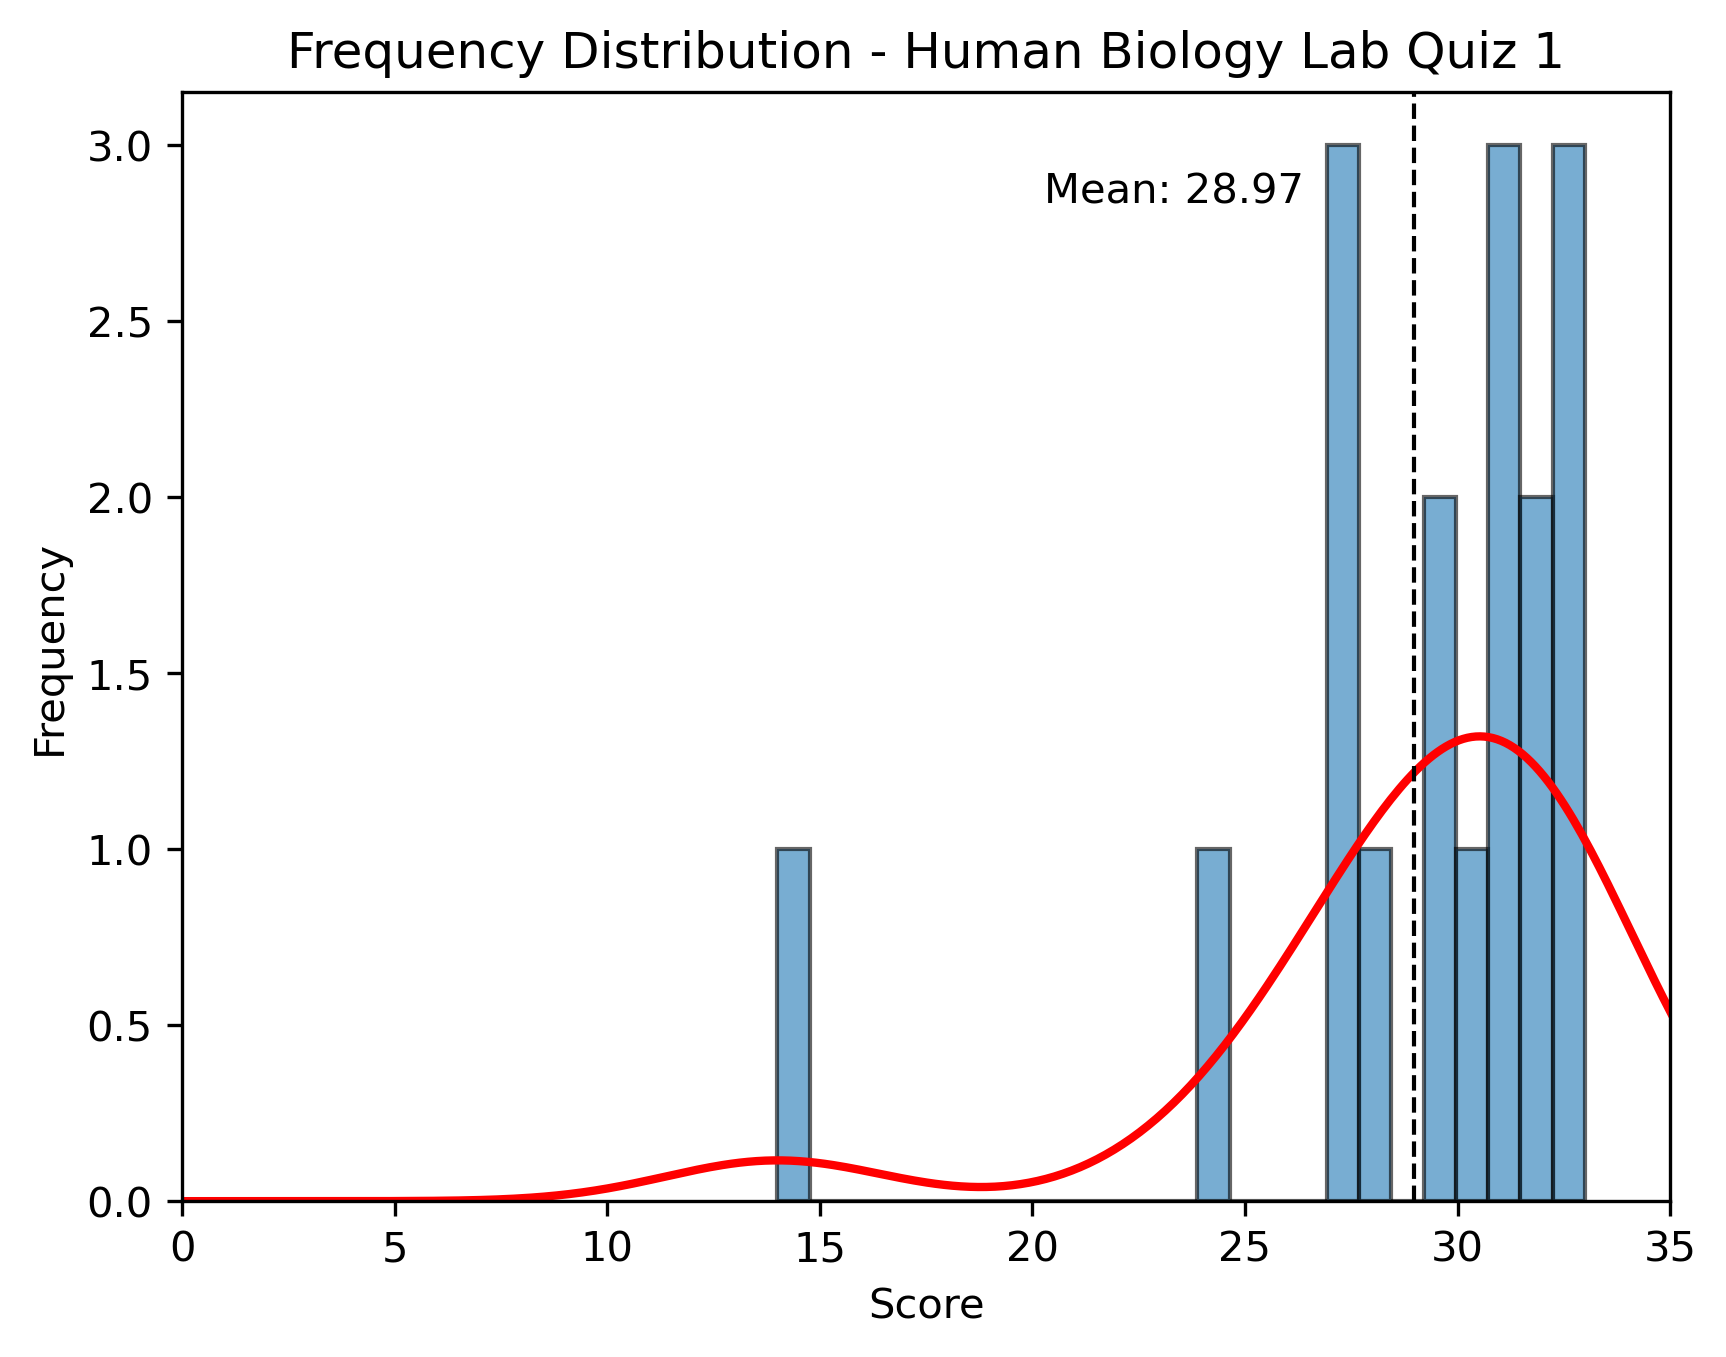

In [7]:
# Plot Histogram on x
x1 = df['Quiz1'].dropna()

# Define number of bins for the histogram
bins = 25

# Plot histogram with actual frequency (density=False)
count_x1, bins_x1, _ = plt.hist(x1, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution - Human Biology Lab Quiz 1', ylabel='Frequency', xlabel='Score')
plt.xlim(0, 35)

# Add KDE curve
kde_x1 = gaussian_kde(x1)
x1_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x1 = bins_x1[1] - bins_x1[0]
plt.plot(x1_range, kde_x1(x1_range) * len(x1) * bin_width_x1, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x1.mean()*.7, max_ylim*0.9, 'Mean: {:.2f}'.format(x1.mean()))

# Display the plot
plt.show()